In [1]:
# Import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from collections import Counter
from imblearn.over_sampling import ADASYN
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics

In [2]:
# Settings
%matplotlib inline
sn.set_style("dark")
sn.set_palette("colorblind")

# Load the dataset
df = pd.read_csv("creditcard.csv")

In [3]:
# Check for missing values and data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
# Display class distribution
print('Normal transactions count: ', df['Class'].value_counts().values[0])
print('Fraudulent transactions count: ', df['Class'].value_counts().values[1])

Normal transactions count:  284315
Fraudulent transactions count:  492


In [5]:
# Create the class count DataFrame
class_count_df = pd.DataFrame(df['Class'].value_counts().rename_axis('Class').reset_index(name='Counts'))
class_count_df['Class'] = class_count_df['Class'].replace({0: 'Normal', 1: 'Fraud'})
class_count_df.head()

,Class,Counts
0,Normal,284315
1,Fraud,492


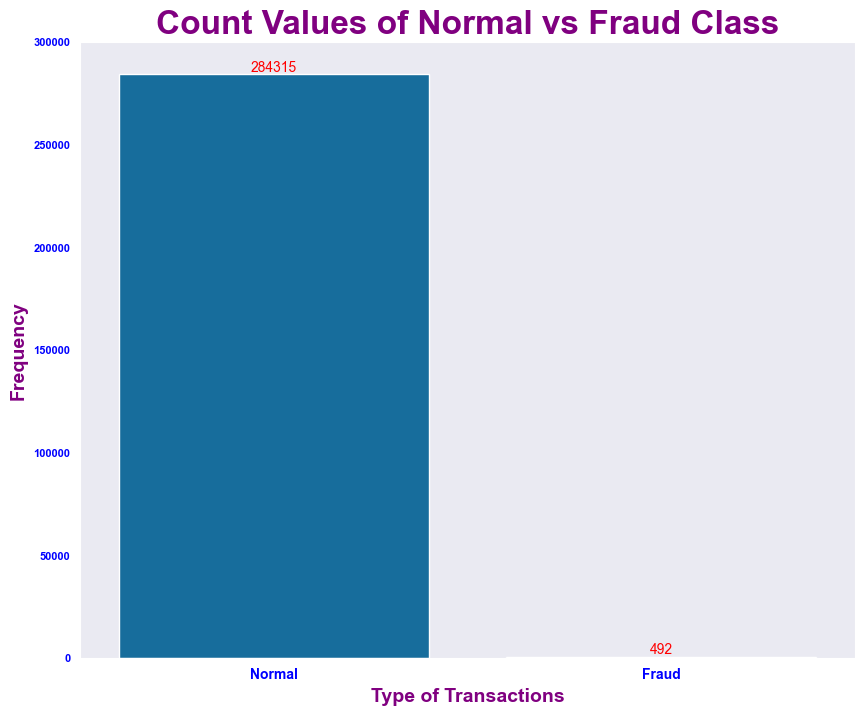

In [7]:
# Plot class distribution
fig = plt.figure(figsize=(10, 8))
ax = sn.barplot(x=class_count_df['Class'], y=class_count_df['Counts'])
ax.bar_label(ax.containers[0], color='red')
ax.set_xticks(np.arange(len(class_count_df['Class'])))
ax.set_xticklabels(labels=list(class_count_df['Class']), c='blue', rotation=0, fontsize=10, fontweight='bold')

# Set y-ticks
yticks = ax.get_yticks().astype(int)
ax.set_yticks(yticks)
ax.set_yticklabels(labels=yticks, c='blue', fontsize=8, fontweight='bold')

plt.xlabel('Type of Transactions', fontsize=14, fontweight='bold', color='purple')
plt.ylabel('Frequency', fontsize=14, fontweight='bold', color='purple')
plt.title('Count Values of Normal vs Fraud Class', fontsize=24, fontweight='bold', color='purple')
plt.show()


In [8]:
# Prepare the data
X = df.drop(columns=['Class'])
y = df['Class']

# Scale the features
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

# Replace infinite values with NaN and fill them with a placeholder value
df = df.replace([np.inf, -np.inf], np.nan).fillna(99999)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.33, random_state=42)

# Apply the ADASYN over-sampling
ada = ADASYN(random_state=42)
print('Original dataset shape {}'.format(Counter(y_train)))
X_res, y_res = ada.fit_resample(X_train, y_train)
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 190477, 1: 343})
Resampled dataset shape Counter({0: 190477, 1: 190471})


In [9]:
# Train LogisticRegression Model
LGR_Classifier = LogisticRegression()
LGR_Classifier.fit(X_res, y_res)

LogisticRegression()

In [10]:
# Train RandomForest Model
RDF_Classifier = RandomForestClassifier(random_state=0)
RDF_Classifier.fit(X_res, y_res)

RandomForestClassifier(random_state=0)

In [11]:
# Train Bernoulli Naive Bayes Model
BNB_Classifier = BernoulliNB()
BNB_Classifier.fit(X_res, y_res)

BernoulliNB()

In [12]:
# Evaluate models
modlist = [
    ('RandomForest Classifier', RDF_Classifier),
    ('LogisticRegression', LGR_Classifier),
    ('Naive Bayes Classifier', BNB_Classifier)
]

print('\n========================== Model Evaluation Results ========================\n')

for name, model in modlist:
    scores = cross_val_score(model, X_res, y_res, cv=10)
    accuracy = metrics.accuracy_score(y_res, model.predict(X_res))
    confusion_matrix = metrics.confusion_matrix(y_res, model.predict(X_res))
    classification = metrics.classification_report(y_res, model.predict(X_res))
    print(f'===== {name} =====\n')
    print(f"Cross Validation Mean Score: {np.round(scores.mean(), 3) * 100}%")
    print(f"Model Accuracy: {np.round(accuracy, 3) * 100}%")
    print(f"Confusion Matrix:\n {confusion_matrix}")
    print(f"Classification Report:\n {classification}\n")



========================== Model Evaluation Results ========================

===== RandomForest Classifier =====

Cross Validation Mean Score: 93.0%
Model Accuracy: 100.0%
Confusion Matrix:
 [[190477      0]
 [     0 190471]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    190477
           1       1.00      1.00      1.00    190471

    accuracy                           1.00    380948
   macro avg       1.00      1.00      1.00    380948
weighted avg       1.00      1.00      1.00    380948


===== LogisticRegression =====

Cross Validation Mean Score: 87.4%
Model Accuracy: 90.10000000000001%
Confusion Matrix:
 [[174114  16363]
 [ 21424 169047]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90    190477
           1       0.91      0.89      0.90    190471

    accuracy                           0.90    380948
   macro avg       0.9

In [13]:
# Test models
print('\n========================== Model Test Results ========================\n')

for name, model in modlist:
    accuracy = metrics.accuracy_score(y_test, model.predict(X_test))
    confusion_matrix = metrics.confusion_matrix(y_test, model.predict(X_test))
    classification = metrics.classification_report(y_test, model.predict(X_test))
    print(f'=== {name} ===')
    print(f"Model Accuracy: {np.round(accuracy, 3) * 100}%")
    print(f"Confusion Matrix:\n {confusion_matrix}")
    print(f"Classification Report:\n {classification}\n")


========================== Model Test Results ========================

=== RandomForest Classifier ===
Model Accuracy: 100.0%
Confusion Matrix:
 [[93819    19]
 [   25   124]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     93838
           1       0.87      0.83      0.85       149

    accuracy                           1.00     93987
   macro avg       0.93      0.92      0.92     93987
weighted avg       1.00      1.00      1.00     93987


=== LogisticRegression ===
Model Accuracy: 91.2%
Confusion Matrix:
 [[85611  8227]
 [    7   142]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.91      0.95     93838
           1       0.02      0.95      0.03       149

    accuracy                           0.91     93987
   macro avg       0.51      0.93      0.49     93987
weighted avg       1.00      0.91      0.95     93987


=== Naive Bayes Cla